# Actividad N° 06: Clustering

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *aw_fb_data.csv* de Apple Watch y Fitbit Data. El objetivo de la actividad aplicar clustering para agrupar los datos y describir cada uno de estos clusters.

# Consigna

**Consideraciones**

- Nos basamos en el dataset de Kaggle: Apple Watch and Fitbit data.
- Repliquen el notebook y apliquen lo aprendido a este dataset.

**Preparación de datos**

- Eliminar la columna X1 y hacer un get dummies.

**KMeans**

- Probar con n_clusters=3.
- Gráfico 3D para las columnas x='gender', y='age', z='calories' y color='activity'

**HDBSCAN**

- Probar con min_cluster_size=80.

**Output**

- Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.

# Código

## Importación de librerías y datos

In [89]:
import pandas as pd
from funpymodeling.exploratory import status
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [90]:
data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)
data.head(3)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


## Análisis inicial de los datos

In [91]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


## Preparación inicial de los datos

In [92]:
data.drop(columns=["X1"], inplace=True)

In [93]:
f_data = pd.get_dummies(data)
f_data.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,sd_norm_heart,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,1.0,0.089692,True,False,True,False,False,False,False,False
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,1.0,0.102088,True,False,True,False,False,False,False,False
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,1.0,0.115287,True,False,True,False,False,False,False,False


In [94]:
std_scaler = StandardScaler()
std_scaler.fit(f_data)
x_data_norm = std_scaler.transform(f_data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,...,6.264000e+03,6.264000e+03,6264.000000,6264.000000,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03
mean,2.268655e-17,2.177909e-16,-5.172533e-16,3.720594e-16,1.814924e-16,9.074620e-17,1.814924e-16,-1.814924e-17,-9.165366e-16,7.985665e-16,...,3.629848e-17,-9.074620e-18,0.000000,0.000000,-3.232833e-17,-2.608953e-17,-2.949251e-17,4.991041e-17,-3.913430e-17,5.671637e-18
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,...,1.000080e+00,1.000080e+00,1.000080,1.000080,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-1.252603e+00,-9.541166e-01,-2.587115e+00,-1.978652e+00,-4.873068e-01,-2.929548e+00,-7.109949e-01,-3.011055e-01,-7.877479e+00,-4.569150e+00,...,-6.471041e-01,-1.452030e-01,-1.183993,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
25%,-6.913270e-01,-9.541166e-01,-9.404466e-01,-7.147873e-01,-4.686358e-01,-3.680869e-01,-6.861079e-01,-3.006985e-01,1.021668e-01,1.348908e-01,...,-6.259839e-01,-1.450410e-01,-1.183993,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
50%,-1.300505e-01,-9.541166e-01,-1.655436e-01,-1.200273e-01,-4.464951e-01,-3.098031e-01,-5.665760e-01,-2.971593e-01,2.083702e-01,3.321103e-01,...,-4.162532e-01,-1.419133e-01,0.844599,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
75%,4.312259e-01,1.048090e+00,9.968107e-01,5.713812e-01,-1.667584e-02,3.325684e-01,3.765169e-02,4.059042e-02,2.842709e-01,4.043337e-01,...,1.251642e-01,-1.221373e-01,0.844599,1.183993,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
max,3.013097e+00,1.048090e+00,2.062302e+00,3.374187e+00,7.201889e+00,3.776815e+00,2.857381e+00,6.991359e+00,5.818567e-01,5.856720e-01,...,5.293335e+00,1.253348e+01,0.844599,1.183993,1.882132e+00,2.365097e+00,2.291614e+00,2.150112e+00,2.458886e+00,2.394887e+00


## Clustering

### KMeans

#### Creación del modelo

In [95]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters = 3,     # el parámetro importante!
    init = 'k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter = 100, 
    random_state = 0,
    n_init = 'auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [96]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster: 
pred_cl

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [97]:
cl_model

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [98]:
from copy import deepcopy

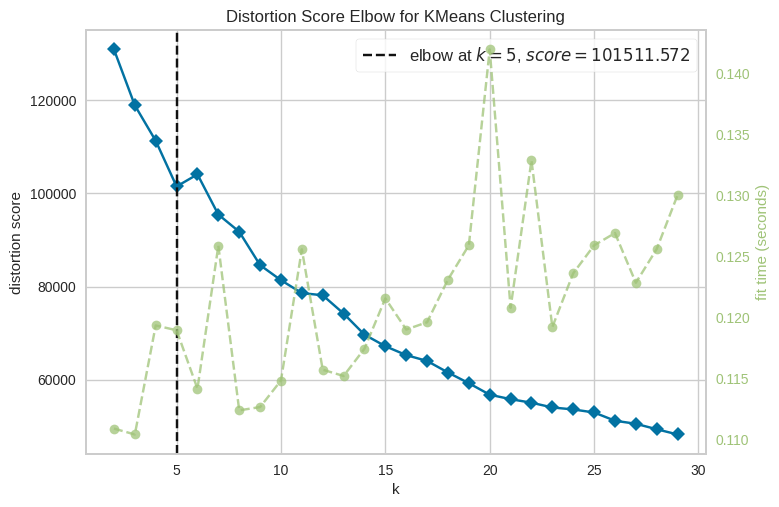

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [99]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2 = deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

In [100]:
cluster_var = 'cluster' # definan nombre de var de clustering
x_data_cl = f_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var] = cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl.head(5)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.089692,True,False,True,False,False,False,False,False,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.102088,True,False,True,False,False,False,False,False,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.115287,True,False,True,False,False,False,False,False,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.129286,True,False,True,False,False,False,False,False,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.144088,True,False,True,False,False,False,False,False,0


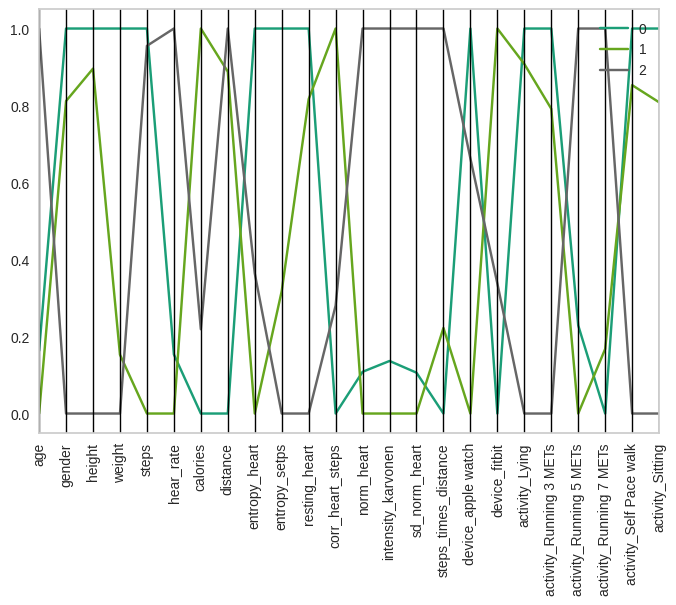

In [101]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

#### Scatter 3D

In [102]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


In [103]:
data.shape

(6264, 18)

In [104]:
# Tomamos muestra para que no nos explote el gráfico ;)
d2 = data.sample(n=300)

In [105]:
import plotly.express as px

fig = px.scatter_3d(d2, x='gender', y='age', z='calories', color='activity')
fig.show()

In [106]:
cluster_var = 'cluster' # definan nombre de var de clustering
x_data_cl2 = data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl2[cluster_var] = cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [107]:
x_data_cl2.cluster = x_data_cl2.cluster.astype(str) 
x_data_cl2.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,0


In [108]:
# Tomamos muestra para que no nos explote el gráfico ;)
d3 = x_data_cl2.sample(n=600)

In [109]:
import plotly.express as px

fig = px.scatter_3d(x_data_cl2, x='cluster', y='gender', z='age', color='calories')
fig.show()

### HDBSCAN

In [110]:
import hdbscan

In [111]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(f_data)

/home/rayo/ent_fun/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/rayo/ent_fun/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



HDBSCAN()

In [112]:
# Nro de cluster
model_hdb.labels_

array([195, 195, 195, ...,  87,  87,  87])

In [113]:
# Ta como raaaro
model_hdb.labels_.max()

226

In [114]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,2675,0.427043,0.427043
1,160,73,0.011654,0.438697
2,116,73,0.011654,0.450351
3,127,67,0.010696,0.461047
4,201,63,0.010057,0.471105
...,...,...,...,...
223,143,5,0.000798,0.996807
224,39,5,0.000798,0.997605
225,16,5,0.000798,0.998404
226,167,5,0.000798,0.999202


In [115]:
# Ese 80 significa que cada cluster va a tener como mínimo 80 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(f_data)

/home/rayo/ent_fun/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/rayo/ent_fun/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [116]:
# Ahí mejoró
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,3380,0.539591,0.539591
1,1,1483,0.23675,0.776341
2,2,1227,0.195881,0.972222
3,0,174,0.027778,1.0


#### Análisis del modelo

In [117]:
cluster_var = 'cluster' # definan nombre de var de clustering
x_data_cl = f_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var] = model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [118]:
x_data_cl.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.089692,True,False,True,False,False,False,False,False,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.102088,True,False,True,False,False,False,False,False,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.115287,True,False,True,False,False,False,False,False,1
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.129286,True,False,True,False,False,False,False,False,1
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.144088,True,False,True,False,False,False,False,False,1


<Axes: xlabel='cluster'>

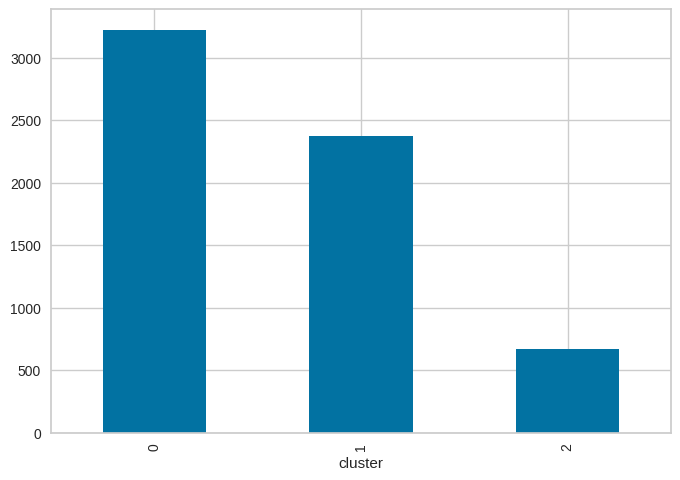

In [119]:
x_data_cl2.cluster.value_counts().sort_index().plot.bar()

In [120]:
# Sacando cluster -1 (ruido)
x_data_cl = x_data_cl[x_data_cl['cluster'] != -1]

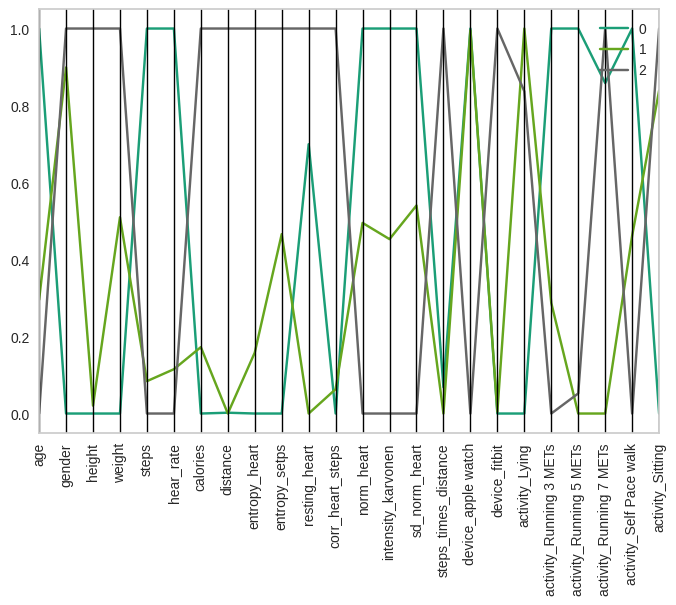

In [121]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [122]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

In [123]:
# sanity check
data_check = data.copy()
data_check['cluster'] = model_hdb2.labels_
#data_check = data_check[['cluster', 'track_name']]

In [124]:
data_check.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,1
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,1
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,1


#### Cálculo de Silhouette

In [125]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(f_data, model_hdb2.labels_)
sil_avg

-0.21245811607860937

In [126]:
sample_silhouette_values = silhouette_samples(f_data, model_hdb2.labels_)
sample_silhouette_values

array([ 0.68584835,  0.69083926,  0.69524082, ..., -0.94444757,
       -0.94444757, -0.94444757])

In [127]:
res_sil = pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})
res_sil.head()

,sil_value,cluster
0,0.685848,1
1,0.690839,1
2,0.695241,1
3,0.693751,1
4,0.691409,1


/home/rayo/ent_fun/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rayo/ent_fun/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



AttributeError: 'QuadContourSet' object has no attribute 'collections'

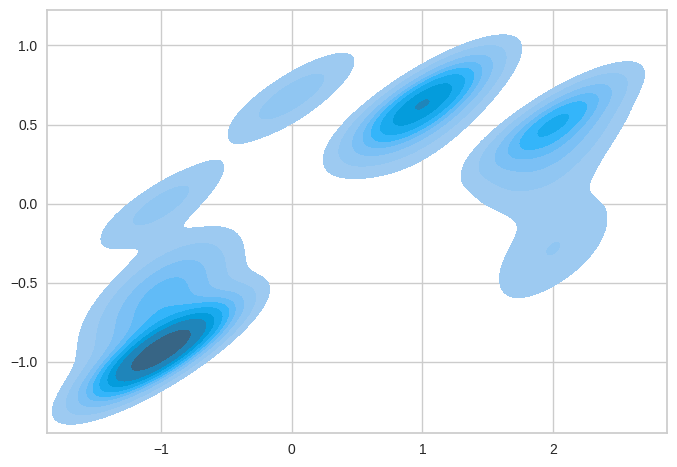

In [128]:
import seaborn as sns

sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<Axes: xlabel='cluster', ylabel='sil_value'>

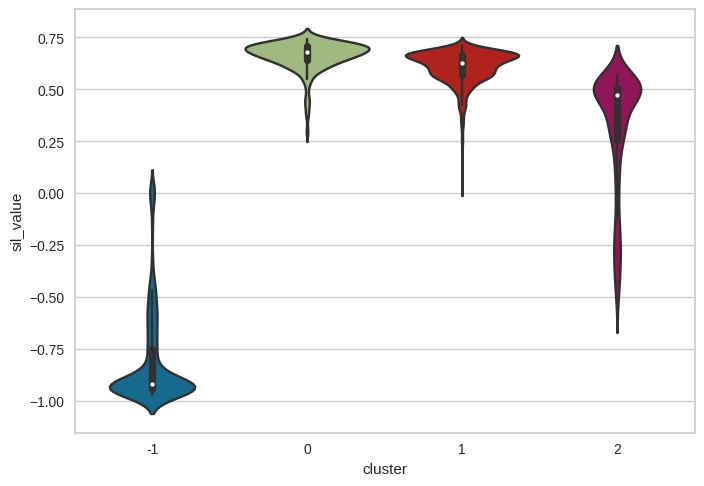

In [ ]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True)

/home/rayo/ent_fun/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rayo/ent_fun/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

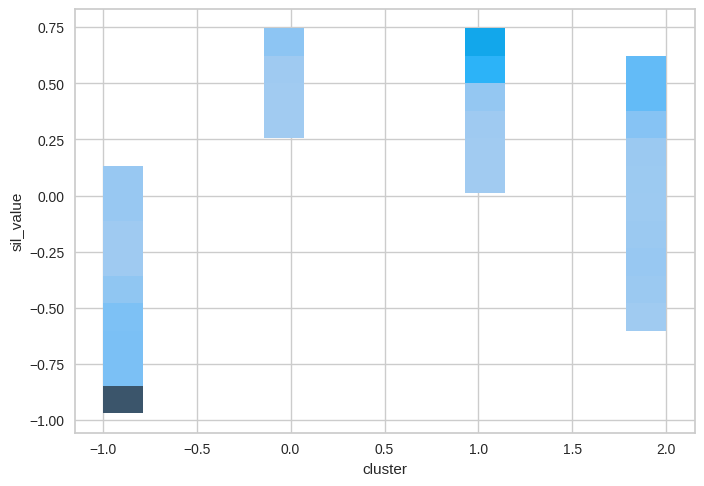

In [129]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

In [130]:
# promedio de silhouette por cluster
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,-0.808922
0,0.663534
1,0.607415
2,0.315458
